# Create test dataframe

In [1]:
import sys
sys.path.insert(0,'..')

import numpy as np
import pandas as pd
from datetime import datetime
from os import environ
from data.get_data import GetData
from data.get_data import DataFactory
from config.config import ConfigFactory
from signals.find_signal import FindSignal
from signal_stat.signal_stat import SignalStat
from indicators.indicators import IndicatorFactory
from signals.find_signal import SignalFactory

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import mplfinance as mpf

plt.style.use('ggplot')

pd.set_option('display.max_rows', 500)

debug = False
# Set environment variable
environ["ENV"] = "debug"
# Set dataframe dict
dfs = {'stat': {'buy': pd.DataFrame(columns=['time', 'ticker', 'timeframe']),
                'sell': pd.DataFrame(columns=['time', 'ticker', 'timeframe'])}}

# Get configs
configs = ConfigFactory.factory(environ).configs
       
# Set list of available exchanges, cryptocurrencies and tickers
exchanges = {'Binance': {'API': GetData(**configs), 'tickers': ['BTTCUSDT']}}

# Get dict of exchange APIs
exchange_apis = dict()
for exchange in exchanges:
    exchange_api = DataFactory.factory(exchange, **configs)
    tickers = exchanges[exchange]['tickers']
    exchange_api.fill_ticker_dict(tickers)
    exchanges[exchange]['API'] = exchange_api

    # Higher timeframe from which we take levels
work_timeframe = configs['Timeframes']['work_timeframe']
    
# For every exchange, ticker and timeframe in base get cryptocurrency data and write it to correspond dataframe
for exchange, exchange_data in exchanges.items():
    exchange_api = exchange_data['API']
    tickers = exchange_data['tickers']
    timeframes = ['1h', '15m']
    for ticker in tickers:
        for timeframe in timeframes:
            print(f'Exchange is {exchange}, ticker is {ticker}, timeframe is {timeframe}')
            if debug:
                df = pd.read_pickle(f'test_{ticker}_{timeframe}.pkl')
                new_data_flag = True
            else:
                # If cryptocurrency dataframe is in dataframe dict - get it, else - create the new one
                df = dfs.get(ticker, dict()).get(timeframe, dict()).get('data', pd.DataFrame())
                # Write data to the dataframe
                df, data_qty = exchange_api.get_data(df, ticker, timeframe)
            # Create indicator list from search signal patterns list, if has new data and
            # data not from higher timeframe, else get only levels
            if data_qty > 1:
                indicators = list()
                points = dict()
                if timeframe == work_timeframe:
                    indicator_list = configs['Indicator_list']
                else:
                    indicator_list = ['SUP_RES', 'LinearReg']
                for ttype in ['buy', 'sell']:
                    for indicator in indicator_list:
                        ind_factory = IndicatorFactory.factory(indicator, ttype, configs)
                        if ind_factory:
                            indicators.append(ind_factory)
                    # Write indicators to dataframe, update dataframe dict
                    dfs = exchange_api.add_indicator_data(dfs, df, ttype, indicators, ticker, timeframe, data_qty)

Exchange is Binance, ticker is BTTCUSDT, timeframe is 1h
Exchange is Binance, ticker is BTTCUSDT, timeframe is 15m


In [17]:
t = pd.Timestamp('2022-12-02 18:45:00')
df[df['time'] >= t]

,time,open,high,low,close,volume,stoch_slowk,stoch_slowd,stoch_slowk_dir,stoch_slowd_dir,...,normalized_vol,quantile_vol,macd,macdsignal,macdhist,macd_dir,macdsignal_dir,atr,linear_reg,linear_reg_angle
526,2022-12-02 18:45:00,7.000000e-07,7.100000e-07,7.000000e-07,7.000000e-07,4.794889e+09,57.142857,5.714286e+01,0.111111,1.221503e-01,...,0.000485,0.016647,-8.570510e-10,-6.686702e-10,-1.883808e-10,0.000000,0.023076,1.030187e-08,79.532762,5.057941e+00
527,2022-12-02 19:00:00,7.100000e-07,7.100000e-07,7.000000e-07,7.000000e-07,6.165402e+09,57.142857,5.714286e+01,0.000000,8.293461e-02,...,0.000624,0.016647,-9.671445e-10,-7.283651e-10,-2.387794e-10,0.252648,0.066453,1.028930e-08,74.346863,4.448599e+00
528,2022-12-02 19:15:00,7.000000e-07,7.100000e-07,7.000000e-07,7.000000e-07,5.393574e+09,57.142857,5.714286e+01,0.000000,3.030303e-02,...,0.000546,0.016647,-1.042378e-09,-7.911678e-10,-2.512107e-10,0.141178,0.083755,1.027724e-08,69.809202,3.910228e+00
529,2022-12-02 19:30:00,7.000000e-07,7.100000e-07,7.000000e-07,7.000000e-07,3.220999e+09,57.142857,5.714286e+01,0.000000,0.000000e+00,...,0.000326,0.016647,-1.089444e-09,-8.508229e-10,-2.386206e-10,0.000000,0.083633,1.026569e-08,65.838749,3.435120e+00
530,2022-12-02 19:45:00,7.000000e-07,7.100000e-07,7.000000e-07,7.000000e-07,4.206745e+09,57.142857,5.714286e+01,0.000000,0.000000e+00,...,0.000426,0.016647,-1.113903e-09,-9.034388e-10,-2.104637e-10,0.000000,0.074489,1.025462e-08,62.364602,3.016276e+00
531,2022-12-02 20:00:00,7.100000e-07,7.100000e-07,7.000000e-07,7.100000e-07,3.725122e+09,57.142857,5.714286e+01,0.000000,0.000000e+00,...,0.000377,0.016647,-3.226508e-10,-7.872812e-10,4.646305e-10,-0.214246,0.002890,1.024401e-08,59.324723,2.647368e+00
532,2022-12-02 20:15:00,7.100000e-07,7.100000e-07,7.000000e-07,7.100000e-07,2.114319e+09,64.285714,5.952381e+01,0.041667,1.388889e-02,...,0.000214,0.016647,3.009528e-10,-5.696344e-10,8.705872e-10,-0.873547,-0.114395,1.023384e-08,56.664830,2.322705e+00
533,2022-12-02 20:30:00,7.000000e-07,7.100000e-07,7.000000e-07,7.100000e-07,1.005325e+09,71.428571,6.428571e+01,0.078704,4.055556e-02,...,0.000102,0.016647,7.861014e-10,-2.984873e-10,1.084589e-09,-0.343683,-0.293676,1.022410e-08,54.337423,2.037183e+00
534,2022-12-02 20:45:00,7.000000e-07,7.100000e-07,7.000000e-07,7.000000e-07,1.997160e+09,64.285714,6.666667e+01,0.045370,5.290123e-02,...,0.000202,0.016647,3.595244e-10,-1.668849e-10,5.264093e-10,-0.287786,-0.397784,1.021476e-08,52.300941,1.786239e+00
535,2022-12-02 21:00:00,7.000000e-07,7.100000e-07,7.000000e-07,7.100000e-07,8.348270e+09,71.428571,6.904762e+01,0.040741,5.091711e-02,...,0.000845,0.016647,8.189353e-10,3.027910e-11,7.886562e-10,0.782408,-0.699446,1.020581e-08,50.519020,1.565806e+00


In [18]:
index = 527
high_result_prices = list()
low_result_prices = list()
atr = df['atr'].iloc[index]
for t in range(1, 25):
    high_result_prices.append(df['high'].iloc[index + t])
    low_result_prices.append(df['low'].iloc[index + t])

In [19]:
high_result_prices

[7.1e-07,
 7.1e-07,
 7.1e-07,
 7.1e-07,
 7.1e-07,
 7.1e-07,
 7.1e-07,
 7.1e-07,
 7.1e-07,
 7.1e-07,
 7.1e-07,
 7.1e-07,
 7.1e-07,
 7.1e-07,
 7.1e-07,
 7.1e-07,
 7.1e-07,
 7.1e-07,
 7.1e-07,
 7.1e-07,
 7.1e-07,
 7.1e-07,
 7.1e-07,
 7.1e-07]

In [20]:
low_result_prices

[7e-07,
 7e-07,
 7e-07,
 7e-07,
 7e-07,
 7e-07,
 7e-07,
 7e-07,
 7e-07,
 7e-07,
 7e-07,
 7e-07,
 7e-07,
 7e-07,
 7e-07,
 7e-07,
 7e-07,
 7e-07,
 7e-07,
 7e-07,
 7e-07,
 7e-07,
 7e-07,
 7e-07]

In [28]:
min(low_result_prices)

7e-07

In [29]:
max(high_result_prices)

7.1e-07

In [30]:
atr

1.0289296345407061e-08

In [27]:
tmp = pd.DataFrame()
signal_price = 7e-07
ttype = 'buy'

for i in range(len(high_result_prices)):
    if ttype == 'buy':
        tmp['result_price'] = [high_result_prices[i]]
        mfe = max(max(high_result_prices[:i+1]) - signal_price, 0) / atr
        tmp[f'mfe_{i+1}'] = [mfe]
        tmp[f'mae_{i+1}'] = max(signal_price - min(low_result_prices[:i+1]), 0) / atr
#     else:
#         tmp['result_price'] = [low_result_prices[i]]
#         mfe = max(signal_price - min(low_result_prices[:i+1]), 0) / atr
#         tmp[f'mfe_{i+1}'] = [mfe]
#         tmp[f'mae_{i+1}'] = max(max(high_result_prices[:i+1]) - signal_price, 0) / atr
tmp

,result_price,mfe_1,mae_1,mfe_2,mae_2,mfe_3,mae_3,mfe_4,mae_4,mfe_5,...,mfe_20,mae_20,mfe_21,mae_21,mfe_22,mae_22,mfe_23,mae_23,mfe_24,mae_24
0,7.100000e-07,0.971884,0.0,0.971884,0.0,0.971884,0.0,0.971884,0.0,0.971884,...,0.971884,0.0,0.971884,0.0,0.971884,0.0,0.971884,0.0,0.971884,0.0


# Test higher_bound and low_bound methods for RSI indicator

This methods return True if at least two of three last indicator points are higher/lower than high/low bound for this indicator.

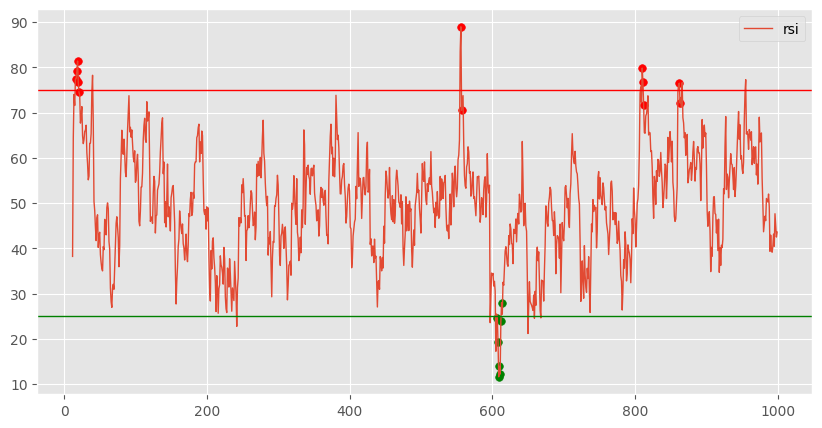

In [16]:
high_bound = 75
low_bound = 25
ttype = 'buy'

# subplots for RSI
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# plot RSI
ax.plot(df.loc[:, 'rsi'], linewidth=1)
ax.axhline(y=low_bound, color='g', linestyle='-', linewidth=1)
ax.axhline(y=high_bound, color='r', linestyle='-', linewidth=1)
leg = ax.legend(['rsi'])

# plot signal points
scatter_rsi_points = list()
rsi_sig = SignalFactory().factory('RSI', ttype, configs)

rsi_idxs =  rsi_sig.lower_bound(low_bound, df['rsi'], df['rsi'].shift(1), df['rsi'].shift(2))
scatter_buy_rsi_points = df.loc[rsi_idxs>0, 'rsi']
ax.scatter(scatter_buy_rsi_points.index, scatter_buy_rsi_points.values, s=30, color='green')

rsi_idxs =  rsi_sig.higher_bound(high_bound, df['rsi'], df['rsi'].shift(1), df['rsi'].shift(2))
scatter_sell_rsi_points = df.loc[rsi_idxs>0, 'rsi']
ax.scatter(scatter_sell_rsi_points.index, scatter_sell_rsi_points.values, s=30, color='red')
    
plt.show()

# Test up_direction and down_direction methods for STOCH indicator

This methods return True if indicator values increase/decrease.

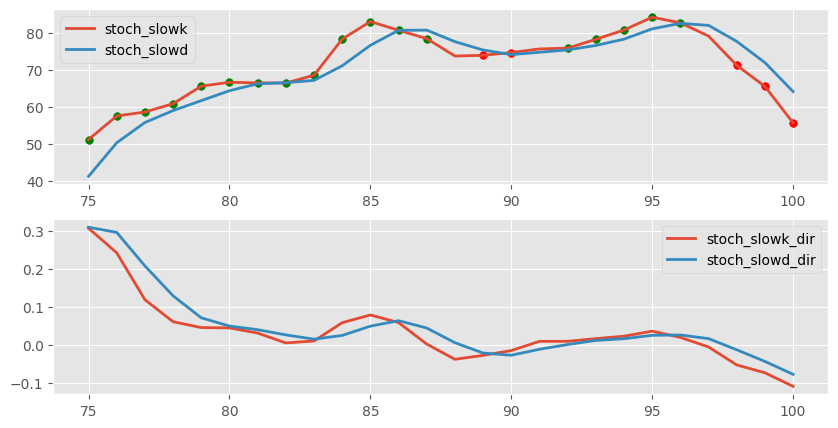

In [17]:
ttype = 'buy'

# subplots for STOCH
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2, sharex=ax1)

# plot STOCH
ax1.plot(df.loc[75:100, 'stoch_slowk'], linewidth=2)
ax1.plot(df.loc[75:100, 'stoch_slowd'], linewidth=2)
ax2.plot(df.loc[75:100, 'stoch_slowk_dir'], linewidth=2)
ax2.plot(df.loc[75:100, 'stoch_slowd_dir'], linewidth=2)
leg = ax1.legend(['stoch_slowk', 'stoch_slowd'])
leg = ax2.legend(['stoch_slowk_dir', 'stoch_slowd_dir'])

# plot signal points
scatter_stoch_points_up = list()
scatter_stoch_points_down = list()

stoch_sig = SignalFactory().factory('STOCH', ttype, configs)

scatter_stoch_points_up = stoch_sig.up_direction(df.loc[75:100, 'stoch_slowk_dir']) & \
                          stoch_sig.up_direction(df.loc[75:100, 'stoch_slowd_dir'])
scatter_stoch_points_down = stoch_sig.down_direction(df.loc[75:100, 'stoch_slowk_dir']) & \
                            stoch_sig.down_direction(df.loc[75:100, 'stoch_slowd_dir'])

ax1.scatter(np.where(scatter_stoch_points_up)[0] + 75, df.loc[np.where(scatter_stoch_points_up)[0] + 75, 'stoch_slowk'], 
            s=30, color='green')
ax1.scatter(np.where(scatter_stoch_points_down)[0] + 75, df.loc[np.where(scatter_stoch_points_down)[0] + 75, 'stoch_slowk'], 
            s=30, color='red')
    
plt.show()

# Test crossed_lines method for STOCH indicator

This methods return True if two lines of indicator has crossed (for previous or pre-previous values).

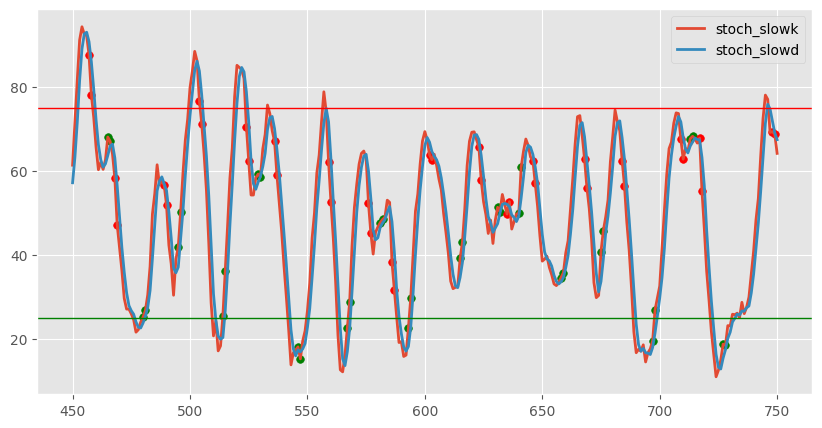

In [30]:
# subplots for RSI
ttype = 'sell'
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# plot STOCH
low_bound = 25
high_bound = 75
low_index = 450
high_index = 750
ax.plot(df.loc[low_index:high_index, 'stoch_slowk'], linewidth=2)
ax.plot(df.loc[low_index:high_index, 'stoch_slowd'], linewidth=2)
ax.axhline(y=low_bound, color='g', linestyle='-', linewidth=1)
ax.axhline(y=high_bound, color='r', linestyle='-', linewidth=1)
leg = ax.legend(['stoch_slowk', 'stoch_slowd'])

# plot signal points
stoch_sig = SignalFactory().factory('STOCH', ttype, configs)
scatter_stoch_points_up = stoch_sig.crossed_lines(False, df.loc[low_index:high_index, 'stoch_diff'], 
                                                  df.loc[low_index:high_index, 'stoch_diff'].shift(1), 
                                                  df.loc[low_index:high_index, 'stoch_diff'].shift(2)) 
scatter_stoch_points_down = stoch_sig.crossed_lines(True, df.loc[low_index:high_index, 'stoch_diff'], 
                                                    df.loc[low_index:high_index, 'stoch_diff'].shift(1), 
                                                    df.loc[low_index:high_index, 'stoch_diff'].shift(2)) 

ax.scatter(np.where(scatter_stoch_points_up)[0] + low_index, df.loc[np.where(scatter_stoch_points_up)[0] + low_index, 
                                                              'stoch_slowk'], s=30, color='green')
ax.scatter(np.where(scatter_stoch_points_down)[0] + low_index, df.loc[np.where(scatter_stoch_points_down)[0] + low_index, 
                                                                'stoch_slowk'], s=30, color='red')
    
plt.show()

# Test find_stoch_signal method for STOCH indicator

This methods return True if STOCH indicator is in overbuy/oversell zone, slowk and slowd lines has crossed and both changed their direction.

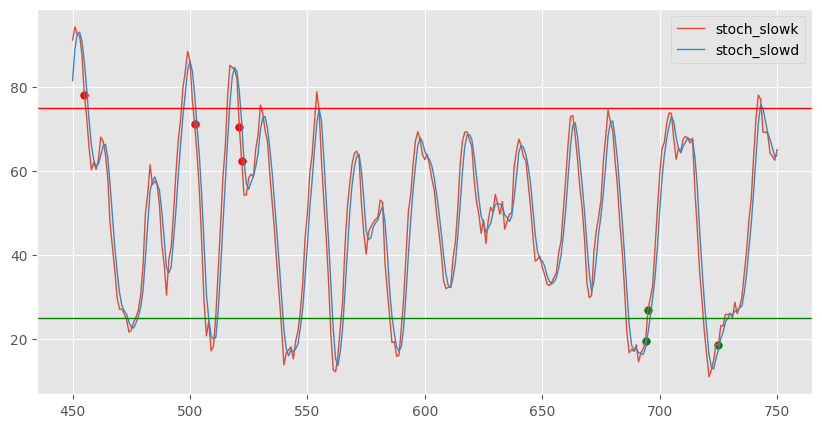

In [2]:
# subplots for RSI
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# plot STOCH
ttype = 'buy'
low_bound = 25
high_bound = 75
low_index = 450
high_index = 750
ax.plot(df.loc[low_index:high_index, 'stoch_slowk'], linewidth=1)
ax.plot(df.loc[low_index:high_index, 'stoch_slowd'], linewidth=1)
ax.axhline(y=low_bound, color='g', linestyle='-', linewidth=1)
ax.axhline(y=high_bound, color='r', linestyle='-', linewidth=1)
leg = ax.legend(['stoch_slowk', 'stoch_slowd'])

# plot signal points
scatter_stoch_points_buy = list()
scatter_stoch_points_sell = list()
stoch_sig_buy = SignalFactory().factory('STOCH', 'buy', configs)
stoch_sig_sell = SignalFactory().factory('STOCH', 'sell', configs)

fs_buy = stoch_sig_buy.find_signal(df)
fs_sell = stoch_sig_sell.find_signal(df)

for index in range(len(fs_buy)):
    if low_index < index < high_index:
            if fs_buy[index] == 1:
                scatter_stoch_points_buy.append((index, df.loc[index, 'stoch_slowk']))
            if fs_sell[index] == 1:
                scatter_stoch_points_sell.append((index, df.loc[index, 'stoch_slowk']))

for point in scatter_stoch_points_buy:
    ax.scatter(point[0], point[1], s=30, color='green')
    
for point in scatter_stoch_points_sell:
    ax.scatter(point[0], point[1], s=30, color='red')
    
plt.show()

# Test crossed_lines method for MACD indicator

This methods return True if macd and macdsignal lines has crossed and both changed their direction.

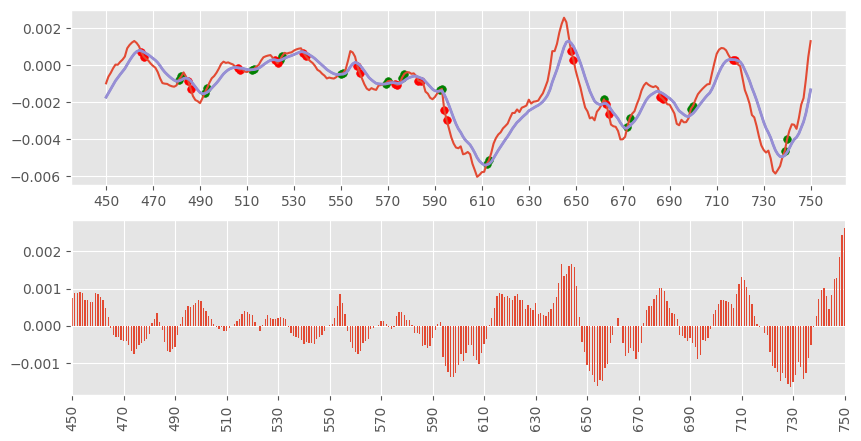

In [4]:
# subplots for MACD
ttype = 'sell'
low_index = 450
high_index = 750
fig, ax = plt.subplots(2, 1, figsize=(10, 5))

# plot MACD
df.loc[low_index:high_index, 'macd'].plot(ax=ax[0])
df.loc[low_index:high_index, 'macdsignal'].plot(ax=ax[0])
ax[0].plot(df.loc[low_index:high_index, 'macdsignal'], linewidth=2)
ax[0].set_xticks(np.arange(low_index, high_index+1, 20))
ax[0].set_xticklabels(np.arange(low_index, high_index+20, 20))

df.loc[low_index:high_index, 'macdhist'].plot.bar(ax=ax[1])
ax[1].set_xticks(ax[0].get_xticks()-low_index)

# plot signal points
macd_sig = SignalFactory().factory('MACD', ttype, configs)
scatter_stoch_points_up = macd_sig.crossed_lines(False, df.loc[low_index:high_index, 'macdhist'], 
                                                  df.loc[low_index:high_index, 'macdhist'].shift(1), 
                                                  df.loc[low_index:high_index, 'macdhist'].shift(2)) 
scatter_stoch_points_down = macd_sig.crossed_lines(True, df.loc[low_index:high_index, 'macdhist'], 
                                                    df.loc[low_index:high_index, 'macdhist'].shift(1), 
                                                    df.loc[low_index:high_index, 'macdhist'].shift(2)) 

ax[0].scatter(np.where(scatter_stoch_points_up)[0] + low_index, 
              df.loc[np.where(scatter_stoch_points_up)[0] + low_index, 'macd'], s=30, color='green')
ax[0].scatter(np.where(scatter_stoch_points_down)[0] + low_index, 
              df.loc[np.where(scatter_stoch_points_down)[0] + low_index, 'macd'], s=30, color='red')
    
plt.show()

# Test find_signal method for MACD indicator

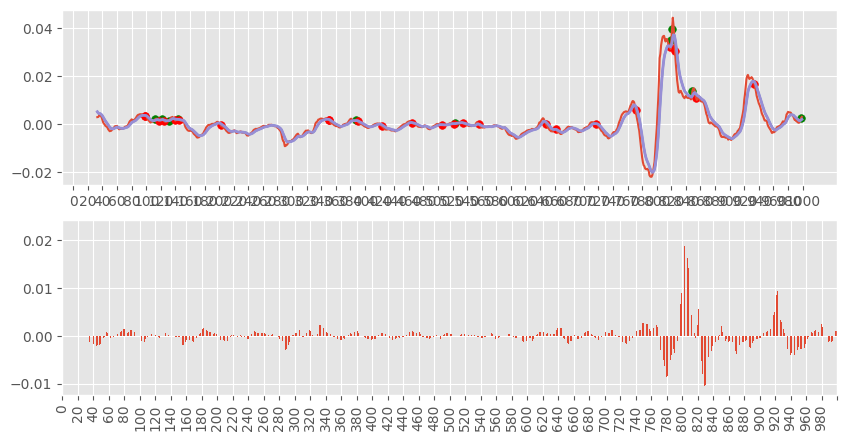

In [2]:
# subplots for MACD
ttype = 'sell'
low_index = 0
high_index = 1000
fig, ax = plt.subplots(2, 1, figsize=(10, 5))

# plot MACD
df.loc[low_index:high_index, 'macd'].plot(ax=ax[0])
df.loc[low_index:high_index, 'macdsignal'].plot(ax=ax[0])
ax[0].plot(df.loc[low_index:high_index, 'macdsignal'], linewidth=2)
ax[0].set_xticks(np.arange(low_index, high_index+1, 20))
ax[0].set_xticklabels(np.arange(low_index, high_index+20, 20))

df.loc[low_index:high_index, 'macdhist'].plot.bar(ax=ax[1])
ax[1].set_xticks(ax[0].get_xticks()-low_index)

# plot signal points
macd_sig_buy = SignalFactory().factory('MACD', 'buy', configs)
macd_sig_sell = SignalFactory().factory('MACD', 'sell', configs)
scatter_stoch_points_buy = macd_sig_buy.find_signal(df.loc[low_index:high_index]) 
scatter_stoch_points_sell = macd_sig_sell.find_signal(df.loc[low_index:high_index]) 

ax[0].scatter(np.where(scatter_stoch_points_buy)[0] + low_index, 
              df.loc[np.where(scatter_stoch_points_buy)[0] + low_index, 'macd'], s=30, color='green')
ax[0].scatter(np.where(scatter_stoch_points_sell)[0] + low_index, 
              df.loc[np.where(scatter_stoch_points_sell)[0] + low_index, 'macd'], s=30, color='red')
    
plt.show()

# Test find_lr method for LR indicator

This methods return True if price is near support level for the buy trade and near resistance level for the sell trade.

In [22]:
import pandas as pd
from talib import LINEARREG, LINEARREG_ANGLE, LINEARREG_SLOPE
timeperiod = 72

df_btc_1h = pd.read_pickle('test_ETHUSDT_1h.pkl')
df_btc_1h['linear_reg'] = LINEARREG(df_btc_1h['close'], timeperiod).reset_index(drop=True)
df_btc_1h['linear_reg_angle'] = LINEARREG_ANGLE(df_btc_1h['close'], timeperiod).reset_index(drop=True)

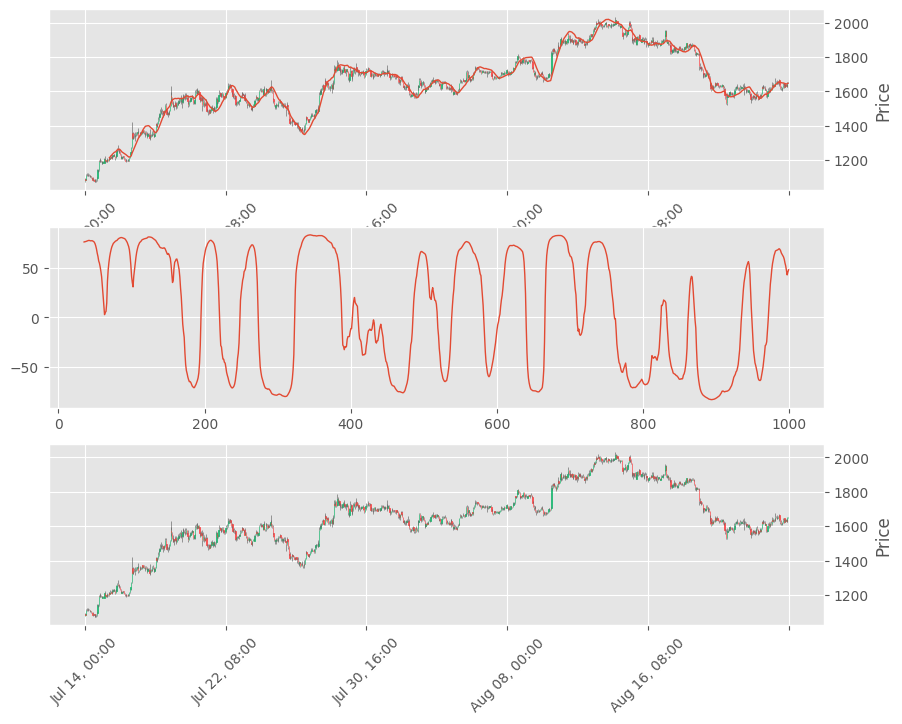

In [26]:
from talib import LINEARREG, LINEARREG_ANGLE, LINEARREG_SLOPE

low_bound = 0
high_bound = 1000
timeperiod = 36

sup_res_sig = SignalFactory().factory('SUP_RES', configs)
dfm = pd.read_pickle('test_ETHUSDT_1h.pkl')
dfh = pd.read_pickle('test_ETHUSDT_1h.pkl')

# subplots for RSI
fig, axs = plt.subplots(3, 1, figsize=(10, 8))

# plot candles
ohlch = dfh.loc[low_bound:high_bound, ['time', 'open', 'high', 'low', 'close', 'volume']]
ohlch = ohlch.set_index('time')
mpf.plot(ohlch, type='candle', ax=axs[0], warn_too_much_data=10000, style='yahoo')

lr = LINEARREG(ohlch['close'], timeperiod).reset_index(drop=True)
lr_angle = LINEARREG_ANGLE(ohlch['close'], timeperiod).reset_index(drop=True)

axs[0].plot(lr, linewidth=1)
axs[1].plot(lr_angle, linewidth=1)

ohlcm = dfm.loc[:, ['time', 'open', 'high', 'low', 'close', 'volume']]
ohlcm = ohlcm.set_index('time')
mpf.plot(ohlcm, type='candle', ax=axs[2], warn_too_much_data=10000, style='yahoo')
        
# plt.show()

# Test find_signal method of FindSignal class 

Parameters: (BTCUSDT, 5m, pattern: (STOCH, RSI))

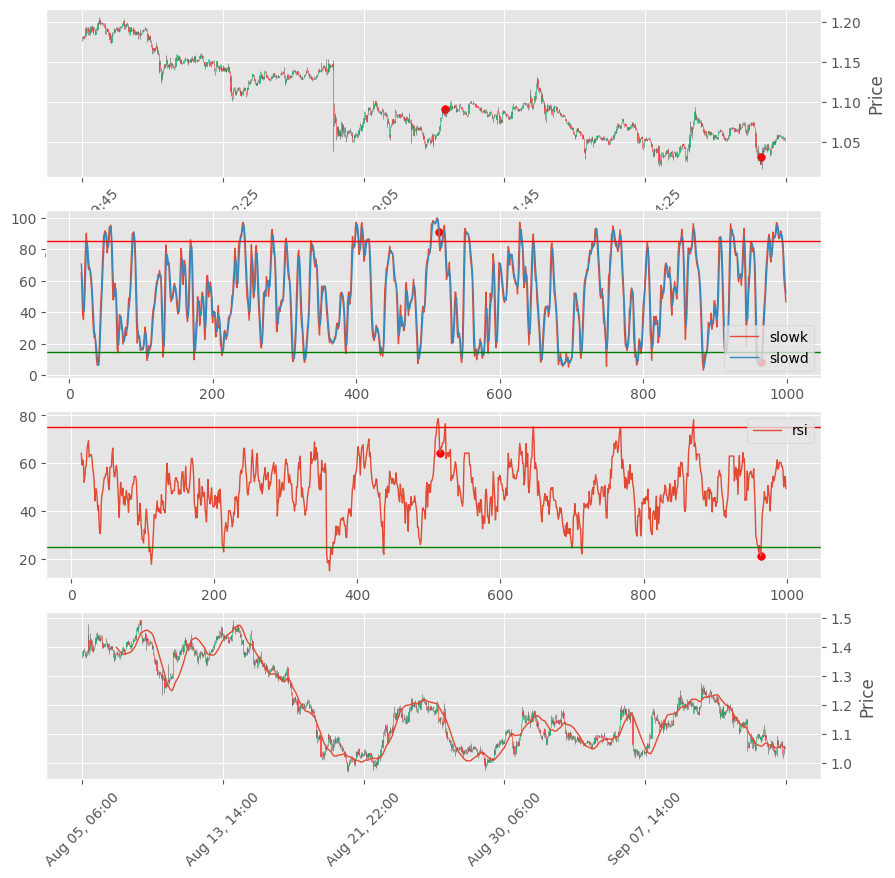

In [43]:
import mplfinance as mpf

low_bound = 0
high_bound = 1000

pd.set_option('display.max_rows', 500)

# find signal points
fs = FindSignal(configs)
fs.patterns = [['STOCH', 'RSI']]
dfm = dfs['CRVUSDT']['5m']['data']
dfh = dfs['CRVUSDT']['1h']['data']
levels = dfs['CRVUSDT']['5m']['levels']
data_qty = 1000
points = fs.find_signal(dfs, 'CRVUSDT', '5m', data_qty)

# subplots for STOCH and RSI
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 10))

# plot candles
ohlc = dfm.loc[low_bound:high_bound, ['time', 'open', 'high', 'low', 'close', 'volume']]
ohlc = ohlc.set_index('time')
mpf.plot(ohlc, type='candle', ax=ax1, warn_too_much_data=10000, style='yahoo')

# plot STOCH
ax2.plot(dfm.loc[low_bound:high_bound, 'stoch_slowk'], linewidth=1)
ax2.plot(dfm.loc[low_bound:high_bound, 'stoch_slowd'], linewidth=1)
# show boundaries
ax2.axhline(y=15, color='g', linestyle='-', linewidth=1)
ax2.axhline(y=85, color='r', linestyle='-', linewidth=1)
leg = ax2.legend(['slowk', 'slowd'])

# plot RSI
ax3.plot(dfm.loc[low_bound:high_bound, 'rsi'], linewidth=1)
# show boundaries
ax3.axhline(y=25, color='g', linestyle='-', linewidth=1)
ax3.axhline(y=75, color='r', linestyle='-', linewidth=1)
leg = ax3.legend(['rsi'])

        
# plot higher timeframe candles + trend
ohlch = dfh[['time', 'open', 'high', 'low', 'close', 'volume']]
ohlch = ohlch.set_index('time')
mpf.plot(ohlch, type='candle', ax=ax4, warn_too_much_data=10000, style='yahoo')

timeperiod = 50
lr = LINEARREG(ohlch['close'], timeperiod).reset_index(drop=True)
lr_angle = LINEARREG_ANGLE(ohlch['close'], timeperiod).reset_index(drop=True)
ax4.plot(lr, linewidth=1)

# plot signal points
scatter_candle_points_buy = list()
scatter_candle_points_sell = list()
scatter_stoch_points = list()
scatter_rsi_points = list()

for point in points:
    if point[1] == 'buy':
        scatter_candle_points_buy.append((point[2], dfm.loc[point[2], 'low']))
    else:
        scatter_candle_points_sell.append((point[2], dfm.loc[point[2], 'high']))
    scatter_stoch_points.append((point[2], dfm.loc[point[2], 'stoch_slowk']))
    scatter_rsi_points.append((point[2], dfm.loc[point[2], 'rsi']))


for point in scatter_candle_points_buy:
    if low_bound < point[0] < high_bound:
        ax1.scatter(point[0]-low_bound, point[1], s=30, color='green')
        
for point in scatter_candle_points_sell:
    if low_bound < point[0] < high_bound:
        ax1.scatter(point[0]-low_bound, point[1], s=30, color='red')
        
for point in scatter_stoch_points:
    if low_bound < point[0] < high_bound:
        ax2.scatter(point[0], point[1], s=30, color='red')
        
for point in scatter_rsi_points:
    if low_bound < point[0] < high_bound:
        ax3.scatter(point[0], point[1], s=30, color='red')

        
plt.show()

# Test find_signal method of FindSignal class 

Parameters: (BTCUSDT, 5m, pattern: (STOCH, RSI, SUP_RES))

In [39]:
import mplfinance as mpf

low_bound = 0
high_bound = 1000

pd.set_option('display.max_rows', 500)

# find signal points
fs = FindSignal(configs)
fs.patterns = [['STOCH', 'RSI', 'SUP_RES']]
df = dfs['CRVUSDT']['5m']['data']
levels = dfs['CRVUSDT']['5m']['levels']
data_qty = 1000
points = fs.find_signal(df, 'CRVUSDT', '5m', levels, data_qty)

# subplots for STOCH and RSI
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

# plot candles
ohlc = df.loc[low_bound:high_bound, ['time', 'open', 'high', 'low', 'close', 'volume']]
ohlc = ohlc.set_index('time')
mpf.plot(ohlc, type='candle', ax=ax1, warn_too_much_data=10000, style='yahoo')

# plot STOCH
ax2.plot(df.loc[low_bound:high_bound, 'stoch_slowk'], linewidth=1)
ax2.plot(df.loc[low_bound:high_bound, 'stoch_slowd'], linewidth=1)
# show boundaries
ax2.axhline(y=15, color='g', linestyle='-', linewidth=1)
ax2.axhline(y=85, color='r', linestyle='-', linewidth=1)
leg = ax2.legend(['slowk', 'slowd'])

# plot RSI
ax3.plot(df.loc[low_bound:high_bound, 'rsi'], linewidth=1)
# show boundaries
ax3.axhline(y=25, color='g', linestyle='-', linewidth=1)
ax3.axhline(y=75, color='r', linestyle='-', linewidth=1)
leg = ax3.legend(['rsi'])

# plot signal points
scatter_candle_points_buy = list()
scatter_candle_points_sell = list()
scatter_stoch_points = list()
scatter_rsi_points = list()

for point in points:
    if point[3] == 'buy':
        scatter_candle_points_buy.append((point[2], df.loc[point[2], 'low']))
    else:
        scatter_candle_points_sell.append((point[2], df.loc[point[2], 'high']))
    scatter_stoch_points.append((point[2], df.loc[point[2], 'stoch_slowk']))
    scatter_rsi_points.append((point[2], df.loc[point[2], 'rsi']))


for point in scatter_candle_points_buy:
    if low_bound < point[0] < high_bound:
        ax1.scatter(point[0]-low_bound, point[1], s=30, color='green')
        
for point in scatter_candle_points_sell:
    if low_bound < point[0] < high_bound:
        ax1.scatter(point[0]-low_bound, point[1], s=30, color='red')
        
for point in scatter_stoch_points:
    if low_bound < point[0] < high_bound:
        ax2.scatter(point[0]-low_bound, point[1], s=30, color='red')
        
for point in scatter_rsi_points:
    if low_bound < point[0] < high_bound:
        ax3.scatter(point[0]-low_bound, point[1], s=30, color='red')

# plot levels
for level in levels:
    if df.loc[low_bound:high_bound, 'low'].min() <= level[0] <= df.loc[low_bound:high_bound, 'high'].max():
        ax1.axhline(y=level[0], color='r', linestyle='-', linewidth=0.75)
        
plt.show()

TypeError: FindSignal.find_signal() takes 5 positional arguments but 6 were given